# CAPSTONE PROJECT
We are going to build a `plant type` classifier model. There are 10 classes in the plant image dataset: banana, coffee, corn, grape, guava, mango, paddy, potato, tea, and tobacco.

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from mpl_toolkits.axes_grid1 import ImageGrid

## Dataset


In [ ]:
data_path = '/content/drive/MyDrive/Capstone Project/Plant Type Classification'

TRAIN_DIR = '/content/drive/MyDrive/Capstone Project/Plant Type Classification/Training'
VAL_DIR = '/content/drive/MyDrive/Capstone Project/Plant Type Classification/Validation'

# BANANA
TRAIN_BANANA_DIR = os.path.join(TRAIN_DIR, "Banana/")
VAL_BANANA_DIR = os.path.join(VAL_DIR, "Banana/")

# COFFEE
TRAIN_COFFEE_DIR = os.path.join(TRAIN_DIR, "Coffee/")
VAL_COFFEE_DIR = os.path.join(VAL_DIR, "Coffee/")

# CORN
TRAIN_CORN_DIR = os.path.join(TRAIN_DIR, "Corn/")
VAL_CORN_DIR = os.path.join(VAL_DIR, "Corn/")

# GRAPE
TRAIN_GRAPE_DIR = os.path.join(TRAIN_DIR, "Grape/")
VAL_GRAPE_DIR = os.path.join(VAL_DIR, "Grape/")

# GUAVA
TRAIN_GUAVA_DIR = os.path.join(TRAIN_DIR, "Guava/")
VAL_GUAVA_DIR = os.path.join(VAL_DIR, "Guava/")

# MANGO
TRAIN_MANGO_DIR = os.path.join(TRAIN_DIR, "Mango/")
VAL_MANGO_DIR = os.path.join(VAL_DIR, "Mango/")

# PADDY
TRAIN_PADDY_DIR = os.path.join(TRAIN_DIR, "Paddy/")
VAL_PADDY_DIR = os.path.join(VAL_DIR, "Paddy/")

# POTATO
TRAIN_POTATO_DIR = os.path.join(TRAIN_DIR, "Potato/")
VAL_POTATO_DIR = os.path.join(VAL_DIR, "Potato/")

# TEA
TRAIN_TEA_DIR = os.path.join(TRAIN_DIR, "Tea/")
VAL_TEA_DIR = os.path.join(VAL_DIR, "Tea/")

#TOBACCO
TRAIN_TOBACCO_DIR = os.path.join(TRAIN_DIR, "Tobacco/")
VAL_TOBACCO_DIR = os.path.join(VAL_DIR, "Tobacco/")

In [ ]:
# Number of images in training directory
PLANT_CATEGORIES = ['Banana', 'Coffee', 'Corn', 'Grape', 'Guava', 'Mango', 'Paddy', 'Potato', 'Tea', 'Tobacco']
for category in PLANT_CATEGORIES:
    print('There are {} {} images for training'.format(category, len(os.listdir(os.path.join(TRAIN_DIR, category)))))

There are Banana 141 images for training
There are Coffee 80 images for training
There are Corn 90 images for training
There are Grape 1362 images for training
There are Guava 86 images for training
There are Mango 400 images for training
There are Paddy 1411 images for training
There are Potato 240 images for training
There are Tea 80 images for training
There are Tobacco 200 images for training


In [ ]:
# Number of images in validation directory
for category in PLANT_CATEGORIES:
    print('There are {} {} images for validation'.format(category, len(os.listdir(os.path.join(VAL_DIR, category)))))

There are Banana 35 images for validation
There are Coffee 20 images for validation
There are Corn 20 images for validation
There are Grape 340 images for validation
There are Guava 21 images for validation
There are Mango 100 images for validation
There are Paddy 353 images for validation
There are Potato 60 images for validation
There are Tea 20 images for validation
There are Tobacco 50 images for validation


Sample banana image:


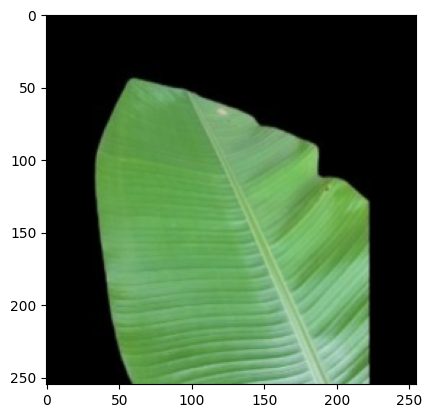

In [ ]:
print("Sample banana image:")
plt.imshow(load_img(f"{os.path.join(TRAIN_BANANA_DIR, os.listdir(TRAIN_BANANA_DIR)[0])}"))
plt.show()

## Training and Validation Generator

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  
  train_generator = train_datagen.flow_from_directory(directory=TRAIN_DIR,
                                                      batch_size=32,
                                                      class_mode = 'sparse', 
                                                      target_size=(128, 128),
                                                      shuffle=False)

  
  validation_datagen = ImageDataGenerator(rescale=1./255)

  
  validation_generator = validation_datagen.flow_from_directory(directory=VAL_DIR,
                                                                batch_size=32,
                                                                class_mode = 'sparse', 
                                                                target_size=(128, 128),
                                                                shuffle=False)
 
  return train_generator, validation_generator

In [ ]:
# Testing generators
train_generator, validation_generator = train_val_generators(TRAIN_DIR, VAL_DIR)

Found 4090 images belonging to 10 classes.
Found 1019 images belonging to 10 classes.


## Building Classifier Model

In [ ]:
def create_model():

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

In [ ]:
# Saving model
model = create_model()

# Training model
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
128/128 [==============================] - 1238s 10s/step - loss: 0.8825 - accuracy: 0.7619 - val_loss: 0.3711 - val_accuracy: 0.8773
Epoch 2/15
128/128 [==============================] - 388s 3s/step - loss: 0.3128 - accuracy: 0.8912 - val_loss: 0.3161 - val_accuracy: 0.9058
Epoch 3/15
128/128 [==============================] - 367s 3s/step - loss: 0.2448 - accuracy: 0.9137 - val_loss: 0.4477 - val_accuracy: 0.8606
Epoch 4/15
128/128 [==============================] - 378s 3s/step - loss: 0.1883 - accuracy: 0.9342 - val_loss: 0.4356 - val_accuracy: 0.8626
Epoch 5/15
128/128 [==============================] - 392s 3s/step - loss: 0.1760 - accuracy: 0.9389 - val_loss: 0.5036 - val_accuracy: 0.8302
Epoch 6/15
128/128 [==============================] - 375s 3s/step - loss: 0.1493 - accuracy: 0.9430 - val_loss: 0.1582 - val_accuracy: 0.9529
Epoch 7/15
128/128 [==============================] - 365s 3s/step - loss: 0.1138 - accuracy: 0.9584 - val_loss: 0.2242 - val_accuracy: 0.93

## Evaluating Model

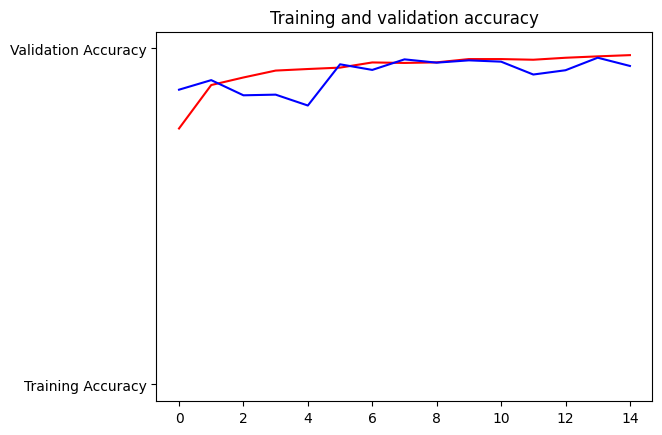

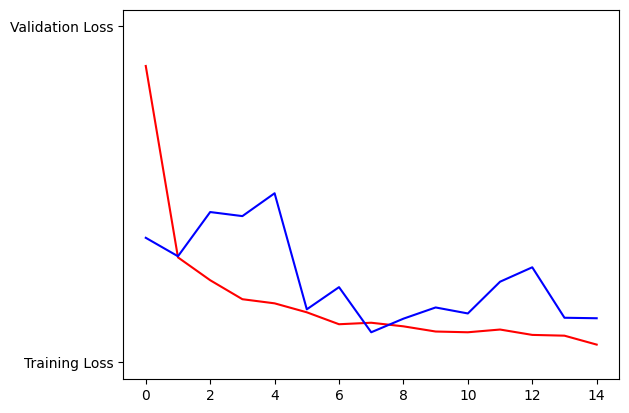

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

# Graph of training and validation accuracy
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

# Graph of training and validation loss
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

## Saving Model

In [ ]:
model.save('/content/drive/MyDrive/Capstone Project')

In [ ]:
model.save('/content/drive/MyDrive/Capstone Project/Plant_Classification_NoTF.h5')

## Export The Model

In [ ]:
RPS_SAVED_MODEL = "rps_saved_model"

In [ ]:
# Export the SavedModel
tf.saved_model.save(model, RPS_SAVED_MODEL)

In [ ]:
%%bash -s $RPS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['conv2d_19_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 128, 128, 3)
      name: serving_default_conv2d_19_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_32'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 10)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


2023-05-24 08:20:39.692609: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
loaded = tf.saved_model.load(RPS_SAVED_MODEL)

In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'conv2d_19_input': TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='conv2d_19_input')})
{'dense_32': TensorSpec(shape=(None, 10), dtype=tf.float32, name='dense_32')}


## Convert Model using TFLite's Converter

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(RPS_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
try:
    from google.colab import files
    files.download('converted_model.tflite')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Capstone Project/Plant_Classification_NoTF.h5')

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 30, 30, 128)      0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 115200)            0         
                                                                 
 dense_31 (Dense)            (None, 128)              

<ipython-input-19-45ebd29a131b>:39: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
Confusion matrix, without normalization
Classification Report
              precision    recall  f1-score   support

      Banana       1.00      1.00      1.00        35
      Coffee       1.00      0.90      0.95        20
        Corn       1.00      0.90      0.95        20
       Grape       1.00      0.88      0.94       340
       Guava       1.00      1.00      1.00        21
       Mango       0.98      1.00      0.99       100
       Paddy       0.98      1.00      0.99       353
      Potato       0.60      1.00      0.75        60
         Tea       1.00      1.00      1.00        20
     Tobacco       0.98      0.82      0.89        50

    accuracy                           0.95      1019
   macro avg       0.95      0.95      0.94      1019
weighted avg       0.96      0.95      0.95      1019



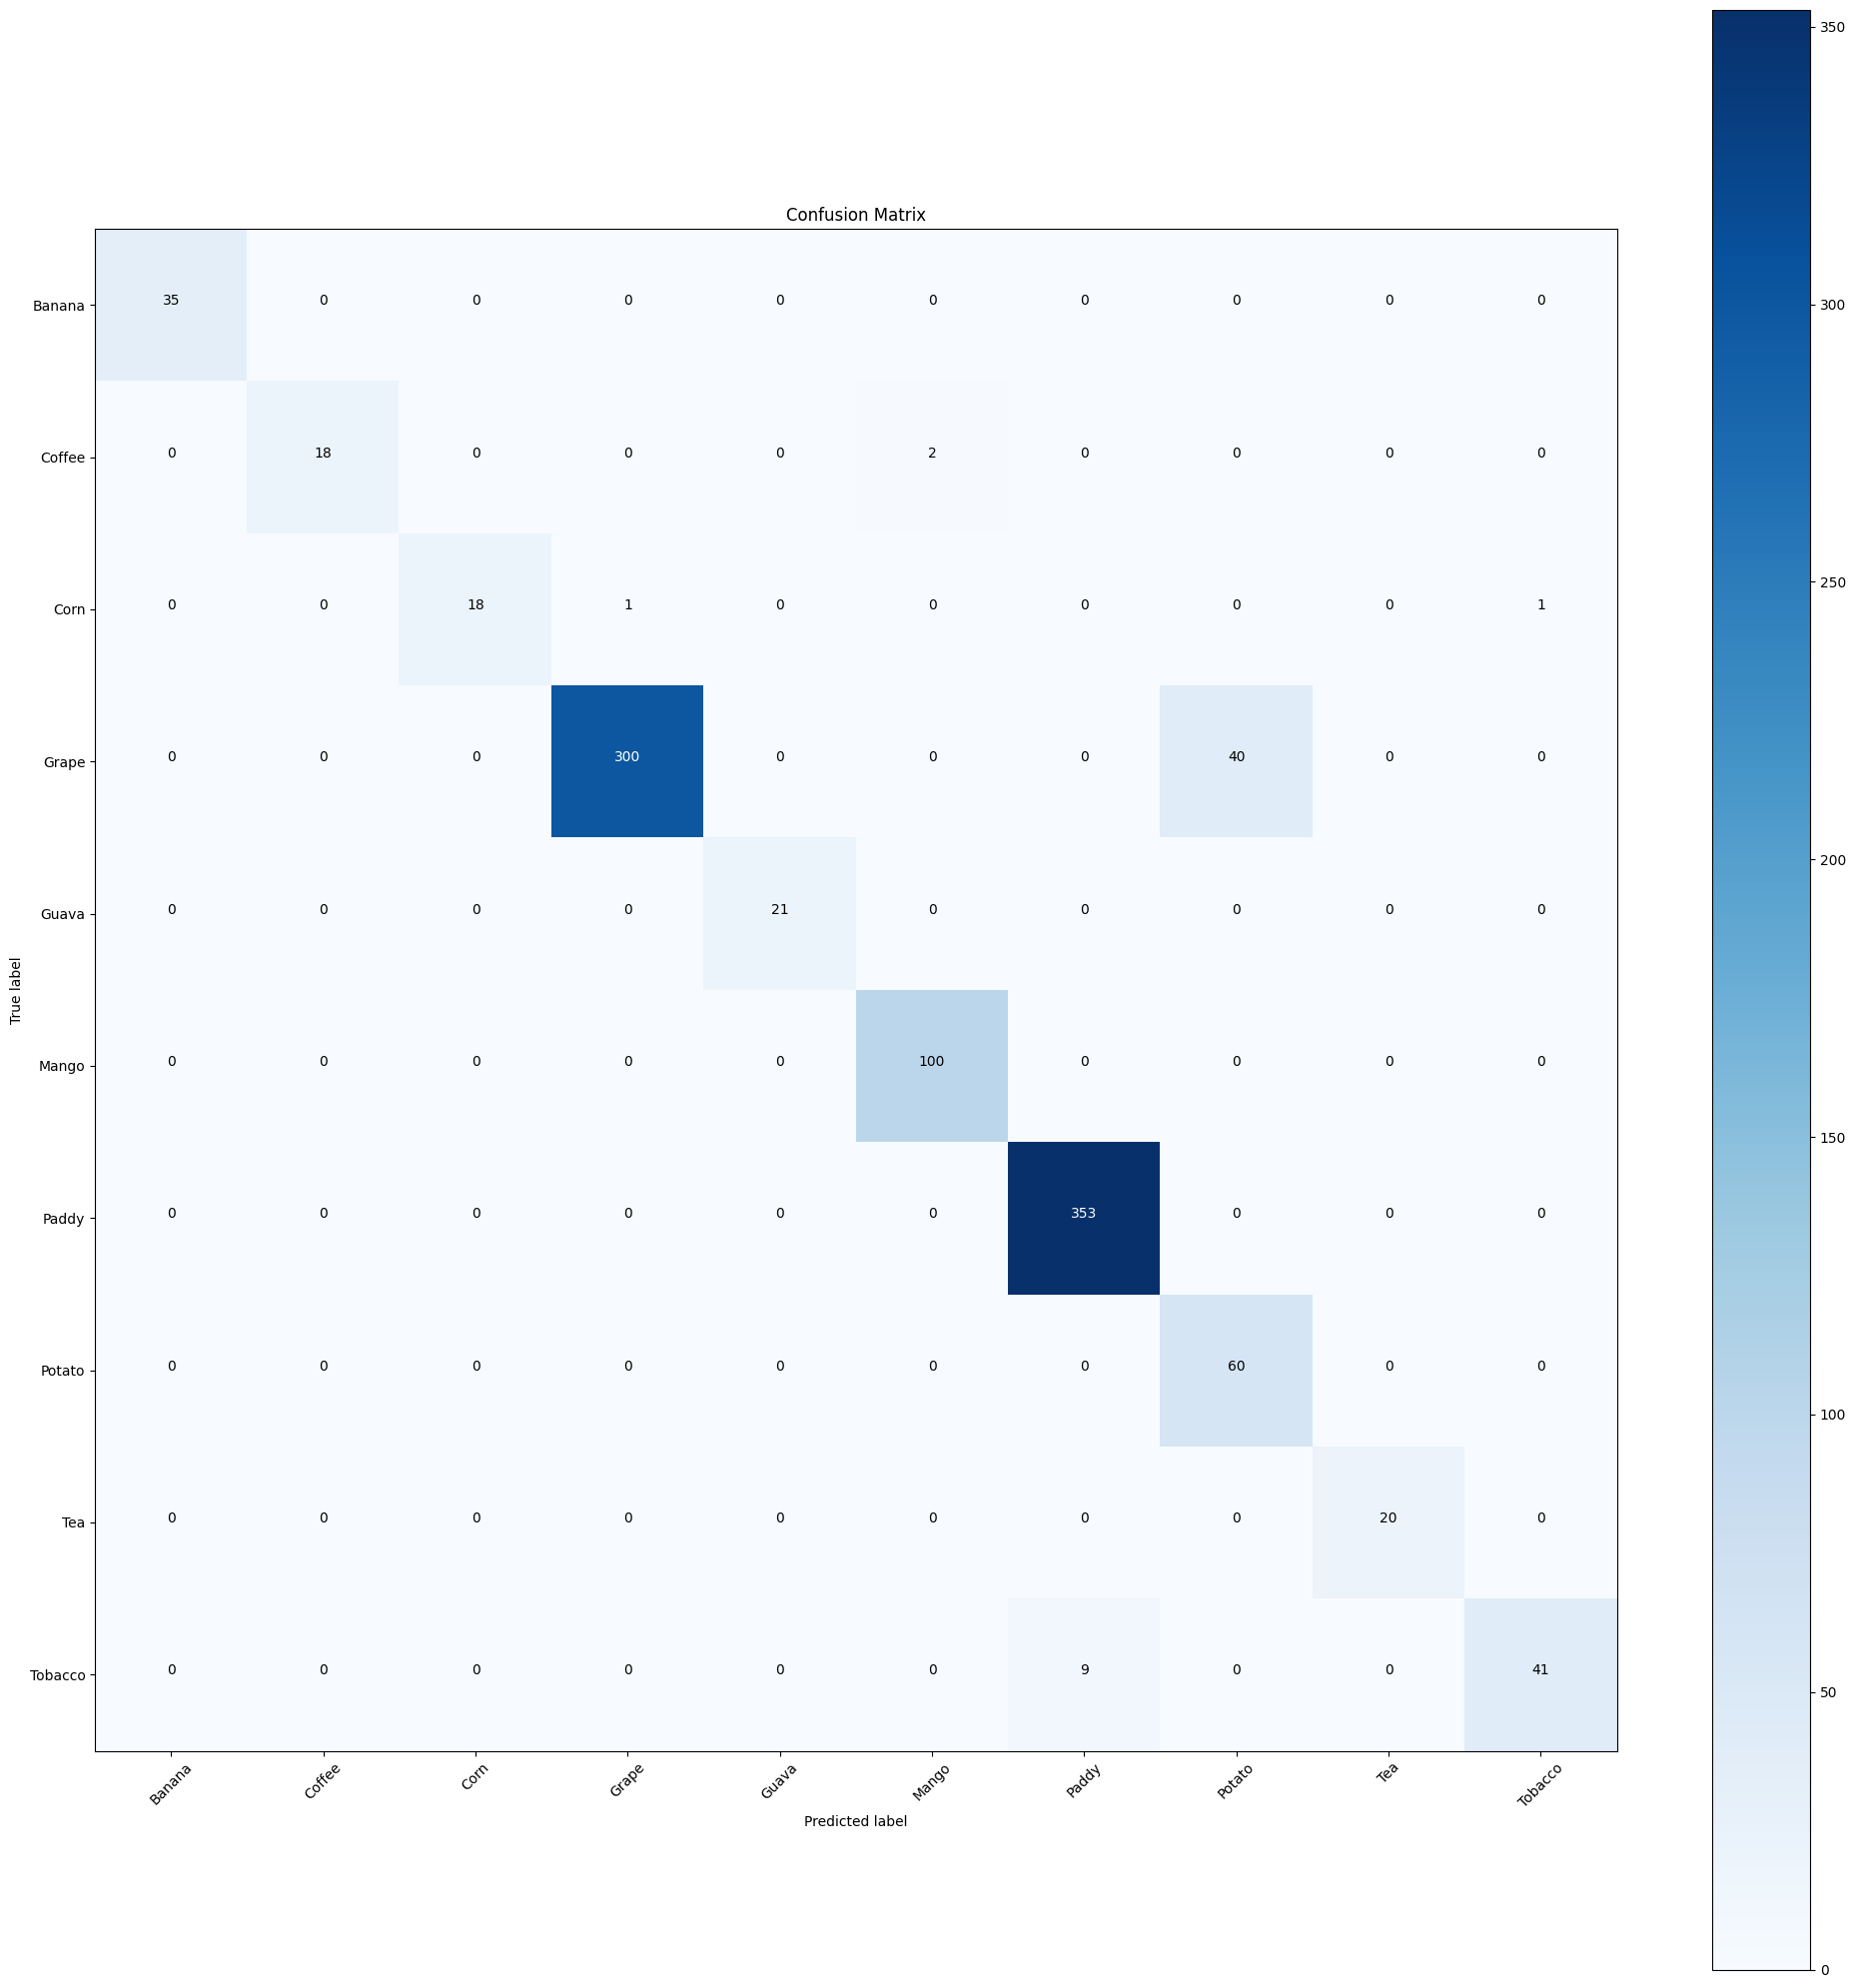

In [ ]:
#Plot the confusion matrix
import numpy as np
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))